In [38]:
# importing the libraries

import pandas as pd
import numpy as np
import nltk
# nltk.download('stopwords')            downloaded!
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
# loading the dataset

data = pd.read_csv("Amazon_DataSet.csv")
print(data.head(), end="\n\n")
print('#'*30 , end="\n\n")
print(data.info(), end= "\n\n")



                                          reviewText Sentiment
0  This is a one of the best apps acording to a b...  Positive
1  This is a pretty good version of the game for ...  Positive
2  this is a really cool game. there are a bunch ...  Positive
3  This is a silly game and can be frustrating, b...  Positive
4  This is a terrific game on any pad. Hrs of fun...  Positive

##############################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Sentiment   20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB
None



In [4]:
data.replace({"Positive": 1, "Negative": -1}, inplace=True)

In [5]:
# stop-word and preprocessing

stop_words = set(stopwords.words('english'))
data['reviewText'] = data['reviewText'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in stop_words]))

print(data['reviewText'])

0        this one best apps acording bunch people i agr...
1        this pretty good version game free. there lots...
2        really cool game. bunch levels find golden egg...
3        this silly game frustrating, lots fun definite...
4        this terrific game pad. hrs fun. my grandkids ...
                               ...                        
19995    app fricken stupid.it froze kindle wont allow ...
19996    please add me!!!!! i need neighbors! ginger101...
19997    love it! game. awesome. wish free stuff houses...
19998    i love love love app side fashion story fights...
19999    this game rip off. here list things to make it...
Name: reviewText, Length: 20000, dtype: object


In [6]:
# which words, how many (bag of words)

X_numeric = CountVectorizer().fit_transform(data['reviewText'])
X_numeric = TfidfTransformer().fit_transform(X_numeric)

In [7]:
# spliting to test & train

X_train, X_test, Y_train, Y_test = train_test_split(X_numeric, data["Sentiment"], test_size=0.2)

In [34]:
# just reviewing the datas

print(X_train)

# print(X_test[0:5])

# print(Y_train[0:5])

# print(Y_test[0:15])

  (0, 250)	0.2521776981428236
  (0, 795)	0.3179382028349884
  (0, 1343)	0.1517428164294731
  (0, 1538)	0.289631364410435
  (0, 2559)	0.2649724515131027
  (0, 2703)	0.42280215593731785
  (0, 3594)	0.2375547776586967
  (0, 4370)	0.20998474592145916
  (0, 7277)	0.11556684787693193
  (0, 7449)	0.19924129183282743
  (0, 9084)	0.08333611712964951
  (0, 10334)	0.2259941949250415
  (0, 11621)	0.122027502607928
  (0, 12201)	0.2235142603021575
  (0, 16616)	0.0944540565239254
  (0, 16840)	0.37214539894969195
  (0, 17654)	0.11463839943972652
  (0, 18489)	0.15273101192924038
  (0, 18508)	0.13823410766538965
  (1, 4824)	0.3079734677302165
  (1, 5219)	0.2962850056428654
  (1, 7142)	0.17946308135794756
  (1, 7587)	0.19259936674263506
  (1, 10305)	0.290459891586014
  (1, 11120)	0.27839575123075466
  :	:
  (15998, 10944)	0.2146389736395976
  (15998, 12676)	0.41699143992110804
  (15998, 15211)	0.2563444572418552
  (15998, 18036)	0.22419660649077178
  (15999, 1270)	0.0683176827239445
  (15999, 3405)	0.524

In [41]:
val = []
for i in X_train:
    val.append(i.sum())

print(val[0:5])
print(len(val))

[3.9886874020308065, 3.308642830182907, 2.6128722203717287, 3.155601640301151, 3.698399498615479]
16000


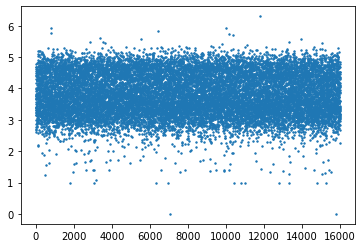

In [52]:
plt.scatter(np.arange(16000),val, s=2)

In [43]:
val_test = []
for i in X_test:
    val_test.append(i.sum())

print(val_test[0:5])
print(len(val_test))

[3.9036973169621754, 3.9353115070306752, 3.528948545208066, 3.4380380712607193, 2.885279113879514]
4000


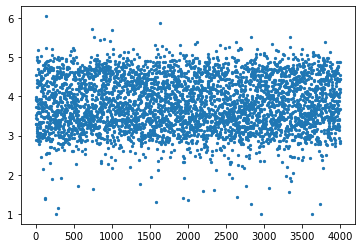

In [53]:
plt.scatter(np.arange(4000),val_test, s=5)

In [9]:
# NB - model : multinomial =====> 87475٪
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, Y_train)

accuracy = model.score(X_test, Y_test)

print("accuracy: ", accuracy)

accuracy:  0.8115


In [10]:
# NB - model : complement ====> 87.475٪
from sklearn.naive_bayes import ComplementNB

model = ComplementNB().fit(X_train, Y_train)

accuracy = model.score(X_test, Y_test)

print("accuracy: ", accuracy)

accuracy:  0.88


In [11]:
# NB - model : bernoili ====> 88٪
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB().fit(X_train, Y_train)

accuracy = model.score(X_test, Y_test)

print("accuracy: ", accuracy)

accuracy:  0.88275


In [12]:
# svm - model : svc ====> 89.85٪

from sklearn.svm import SVC

model = SVC().fit(X_train, Y_train)

accuracy = model.score(X_test, Y_test)

print("accuracy: ", accuracy)

accuracy:  0.90075


In [13]:
# let`s see some predictions

pred = model.predict(X_test)

print(pred[0:50])
print(Y_test[0:50])

[-1  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1  1
 -1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1  1  1
  1  1]
8093    -1
12642    1
10141    1
7657    -1
8198     1
5768     1
15761   -1
1418     1
4071    -1
435      1
18081   -1
685      1
3173    -1
7218    -1
8537     1
4122    -1
2096     1
15054    1
10518    1
4520    -1
12214    1
8165    -1
2872     1
3306    -1
16900   -1
18306    1
12294    1
2674     1
16441    1
9423    -1
13974    1
5974     1
16192   -1
927      1
6602     1
7147    -1
2878    -1
12095    1
12374    1
3510    -1
18161    1
19156   -1
16058    1
13373    1
19891    1
7863     1
18545    1
3136     1
19650    1
6039     1
Name: Sentiment, dtype: int64


<BarContainer object of 4000 artists>

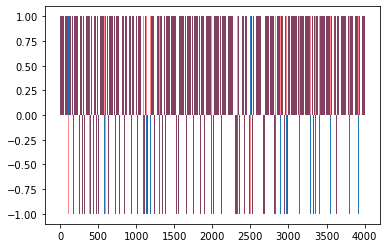

In [71]:
plt.bar(np.arange(4000), Y_test)
plt.bar(np.arange(4000), pred, alpha=0.45, color ='red' )